In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
dfu = pd.read_excel('censobrUFs.xlsx')
dfu.head()

,UF,Código,Gentílico [-],Governador [2019],Capital,Area,População,Densidade,Matrículas no ensino fundamental,IDH[2010],Receitas[2017],Despesas[2017],Rendimento mensal domiciliar per capita,Total de veículos
0,Acre,12.0,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164173.431,906876.0,4.47,156679.0,0.663,6.632883e+06,6.084417e+06,917.0,306258.0
1,Alagoas,27.0,alagoano,JOSE RENAN VASCONCELOS CALHEIROS FILHO,Maceió,27830.656,3365351.0,112.33,464704.0,0.631,1.195044e+07,1.046063e+07,796.0,930933.0
2,Amapá,16.0,amapaense,ANTONIO WALDEZ GÓES DA SILVA,Macapá,142470.762,877613.0,4.69,134820.0,0.708,5.396417e+06,4.224464e+06,893.0,215330.0
3,Amazonas,13.0,amazonense,WILSON MIRANDA LIMA,Manaus,1559167.878,4269995.0,2.23,700104.0,0.674,1.732846e+07,1.532490e+07,852.0,969722.0
4,Bahia,29.0,baiano,RUI COSTA DOS SANTOS,Salvador,564760.427,14985284.0,24.82,1947177.0,0.660,5.019100e+07,4.557016e+07,965.0,4506825.0
5,Ceará,23.0,cearense,CAMILO SOBREIRA DE SANTANA,Fortaleza,148894.442,9240580.0,56.76,1165368.0,0.682,2.842022e+07,2.460835e+07,1028.0,3395382.0
6,Distrito Federal,53.0,brasiliense,IBANEIS ROCHA BARROS JUNIOR,Brasília,5760.784,3094325.0,444.66,373032.0,0.824,2.381221e+07,2.199046e+07,2475.0,1934210.0
7,Espírito Santo,32.0,capixaba ou espírito-santense,JOSE RENATO CASAGRANDE,Vitória,46074.447,4108508.0,76.25,501920.0,0.740,1.968562e+07,1.439234e+07,1347.0,2078459.0
8,Goiás,52.0,goiano,RONALDO RAMOS CAIADO,Goiânia,340242.854,7206589.0,17.65,861291.0,0.735,3.788534e+07,2.424838e+07,1258.0,4203370.0
9,Maranhão,21.0,maranhense,FLÁVIO DINO DE CASTRO E COSTA,São Luís,329651.495,7153262.0,19.81,1123973.0,0.639,1.850326e+07,1.762717e+07,676.0,1855570.0


In [3]:
df = pd.read_excel('indicadoressegurancapublicauf.xlsx')
df.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2021,janeiro,39
1,Acre,Furto de veículo,2021,janeiro,55
2,Acre,Homicídio doloso,2021,janeiro,14
3,Acre,Lesão corporal seguida de morte,2021,janeiro,0
4,Acre,Roubo a instituição financeira,2021,janeiro,0


In [4]:
crime_UF = df.groupby(by = 'UF')['Ocorrências'].sum().reset_index()#.sort_values(ascending = False)
crime_UF.head()

,UF,Ocorrências
0,Acre,10591
1,Alagoas,42767
2,Amapá,11595
3,Amazonas,48791
4,Bahia,188834


In [5]:
crime_tipo = df.groupby(by = 'Tipo Crime')['Ocorrências'].sum().sort_values(ascending = False).reset_index()
crime_tipo.head()

,Tipo Crime,Ocorrências
0,Furto de veículo,1516590
1,Roubo de veículo,1412246
2,Estupro,316513
3,Homicídio doloso,296113
4,Tentativa de homicídio,240683


In [11]:
crime_UF['População'] = dfu['População']
crime_UF['Area'] = dfu['Area']
crime_UF['Densidade'] = dfu['Densidade']
crime_UF['Veiculos'] = dfu['Total de veículos']
crime_UF['Receita'] = dfu['Receitas[2017]']
crime_UF['Proporção'] = crime_UF['Ocorrências']/dfu['População']
crime_UF = crime_UF.sort_values('Ocorrências',ascending=False)
crime_UF.head()

,UF,Ocorrências,População,Area,Densidade,Veiculos,Receita,Proporção
25,São Paulo,1149075,46649132.0,248219.481,166.23,30778960.0,2.328225e+08,0.024632
20,Rio de Janeiro,486208,17463349.0,43750.426,365.23,7087797.0,7.848814e+07,0.027842
12,Minas Gerais,265267,21411923.0,586513.993,33.41,12053218.0,9.719982e+07,0.012389
19,Rio Grande do Sul,256339,11466630.0,281707.149,37.96,7495615.0,6.639747e+07,0.022355
13,Paraná,214313,11597484.0,199298.982,52.40,8077413.0,6.016358e+07,0.018479
4,Bahia,188834,14985284.0,564760.427,24.82,4506825.0,5.019100e+07,0.012601
16,Pernambuco,183208,9674793.0,98067.880,89.62,3223404.0,3.574603e+07,0.018937
8,Goiás,151840,7206589.0,340242.854,17.65,4203370.0,3.788534e+07,0.021070
5,Ceará,131308,9240580.0,148894.442,56.76,3395382.0,2.842022e+07,0.014210
15,Pará,109403,8777124.0,1245870.707,6.07,2229234.0,2.584945e+07,0.012465


Text(0.5, 0, 'Estados do Brasil')

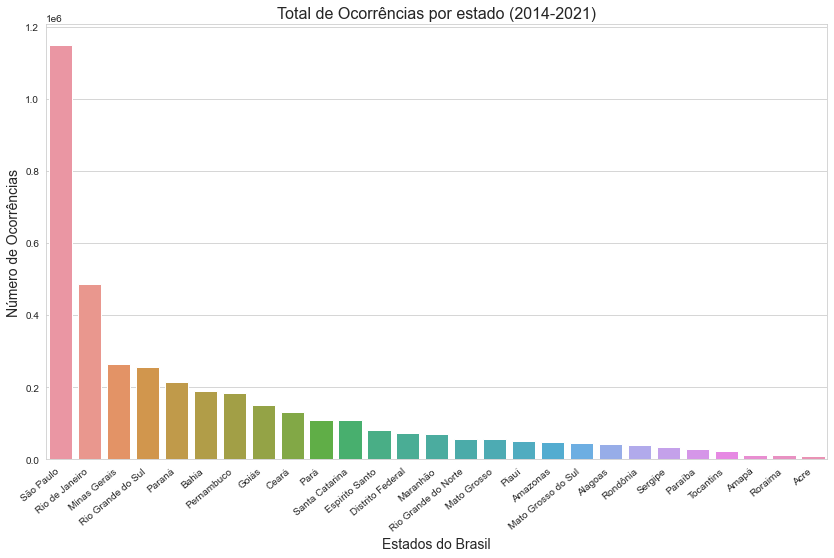

In [7]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=crime_UF,x='UF',y='Ocorrências')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total de Ocorrências por estado (2014-2021)',fontsize=16)
ax.set_ylabel('Número de Ocorrências',fontsize=14)
ax.set_xlabel('Estados do Brasil',fontsize=14)

Text(0.5, 0, 'Estados do Brasil')

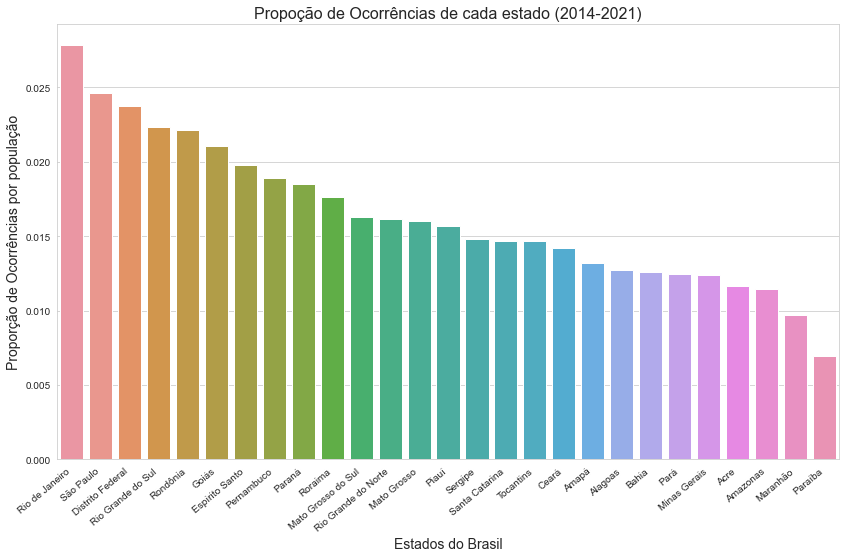

In [18]:
proporção_UF = data=crime_UF.sort_values('Proporção',ascending=False)

plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=proporção_UF,x='UF',y='Proporção')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Propoção de Ocorrências de cada estado (2014-2021)',fontsize=16)
ax.set_ylabel('Proporção de Ocorrências por população',fontsize=14)
ax.set_xlabel('Estados do Brasil',fontsize=14)

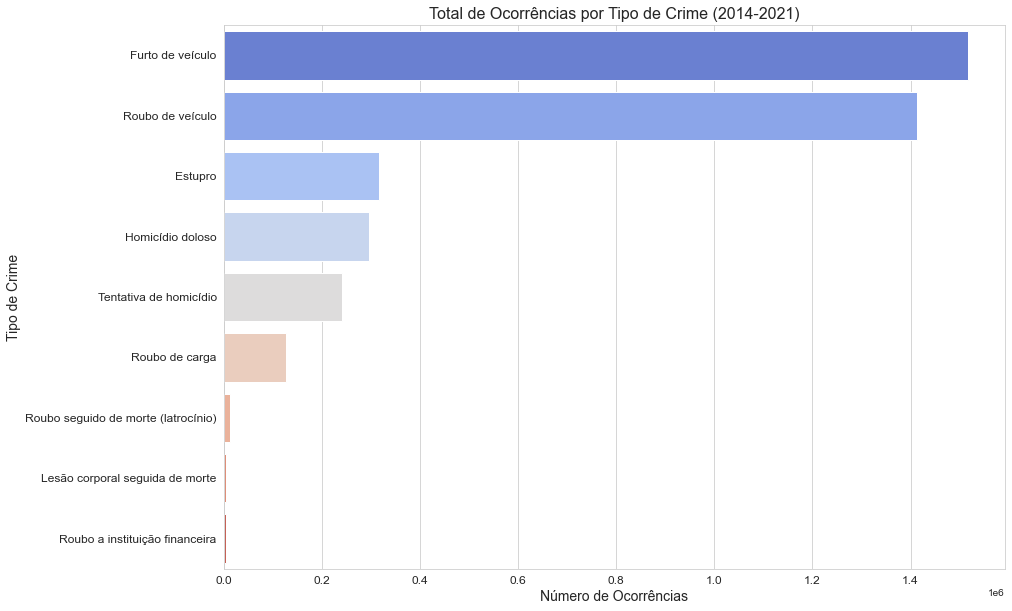

In [8]:
# Plot Figure
plt.figure(figsize=(14,10)) # this creates a figure 14 inch wide, 10 inch high
ax = sns.barplot(data=crime_tipo,y='Tipo Crime',x='Ocorrências',palette='coolwarm')
ax.set_title('Total de Ocorrências por Tipo de Crime (2014-2021)',fontsize=16)
ax.set_ylabel('Tipo de Crime',fontsize=14)
ax.set_xlabel('Número de Ocorrências',fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

Text(0.5, 0, 'Linha do tempo')

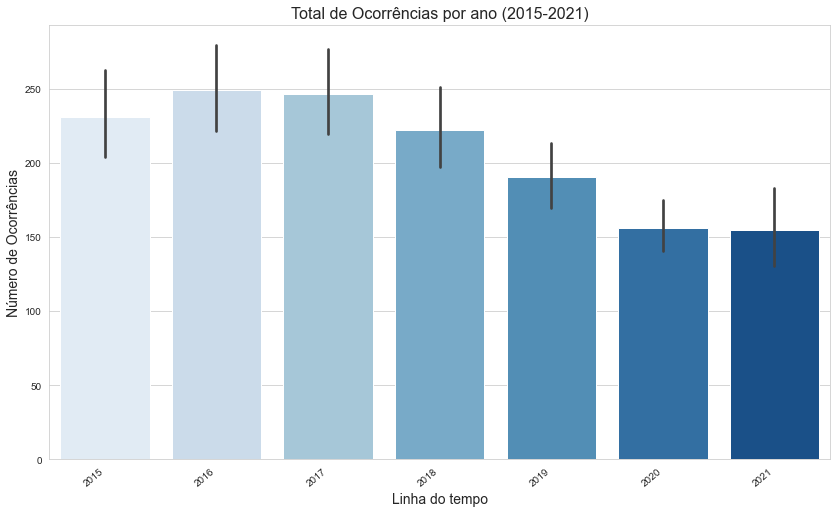

In [9]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=df,x='Ano',y='Ocorrências',palette='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total de Ocorrências por ano (2015-2021)',fontsize=16)
ax.set_ylabel('Número de Ocorrências',fontsize=14)
ax.set_xlabel('Linha do tempo',fontsize=14)

<AxesSubplot:title={'center':'Mapa de calor correlativo'}>

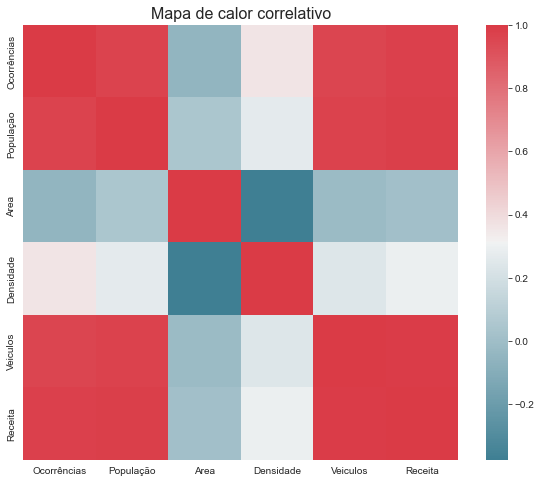

In [10]:
f,ax = plt.subplots(figsize=(10, 8))
ax.set_title('Mapa de calor correlativo',fontsize=16)
corr = crime_UF.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)